https://www.kaggle.com/c/titanic/data

# Objective
This competition requires to perform binary prediction task. Model needs to predict each passenger's fate (eather survived: 1 or not: 0).

## Scoring Metric

In [59]:
from IPython.core.display import display, HTML 
display(HTML("<style>.container { width:100% !important; }</style>"))
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
train_df = pd.read_csv("../data/raw/train.csv")
test_df = pd.read_csv("../data/raw/test.csv")

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [6]:
print("Training data has {} entries.".format(len(train_df)))
print("Test data has {} entries.".format(len(test_df)))

Training data has 891 entries.
Test data has 418 entries.


Below EDA codes are mostly taken from https://www.kaggle.com/dejavu23/titanic-eda-to-ml-beginner 

In [7]:
train_df.info()
print()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null floa

In [8]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


Comparing distribution of features in df_train and df_test, Pclass and Age seem very similar, distributions for SibSo, Parch and Fare only slightly different

In [10]:
train_df.describe() - test_df.describe()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
count,382.000000,474.000000,473.000000,473.000000,473.000000,473.000000,NaN
mean,-0.573473,-3.422981,-0.010751,-654.500000,0.043092,0.075639,NaN
std,0.345288,-6.214148,-0.175372,136.543384,-0.005766,0.205984,NaN
min,0.250000,0.000000,0.000000,-891.000000,0.000000,0.000000,NaN
25%,-0.875000,0.014600,0.000000,-772.750000,1.000000,0.000000,NaN
50%,1.000000,0.000000,0.000000,-654.500000,0.000000,0.000000,NaN
75%,-1.000000,-0.500000,0.000000,-536.250000,0.000000,0.000000,NaN
max,4.000000,0.000000,-3.000000,-418.000000,0.000000,0.000000,NaN


Of all passengers in df_train, how many survived, how many died ?

0.3838383838383838


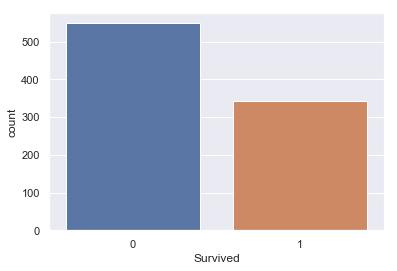

In [11]:
sns.countplot(x='Survived', data=train_df);
print(train_df.Survived.sum()/train_df.Survived.count())

more people died than survived (38% survived)

-> base model : no survivors

submission : 0.627 accuracy

## Sex: Female more likely to survive than male

In [12]:
train_df.groupby(['Survived', 'Sex'])['Survived'].count()

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Survived, dtype: int64

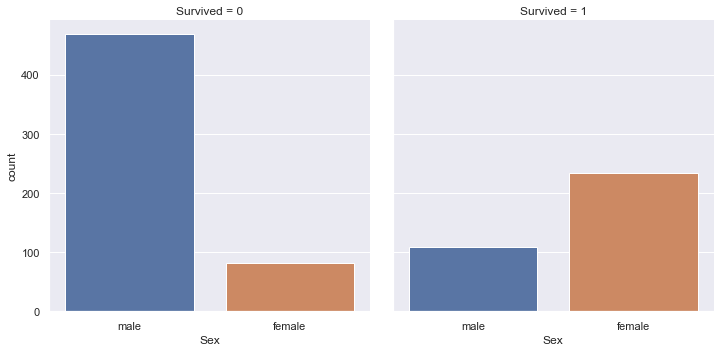

In [13]:
sns.catplot(x='Sex', col='Survived', kind='count', data=train_df)

In [39]:
def percent_of_survival(cat, val):
    return train_df[train_df[cat] == val].Survived.sum() \
            / train_df[train_df[cat] == val].Survived.count()
print("% of women survived: ", percent_of_survival('Sex', 'female'))
print("% of men survived: ", percent_of_survival('Sex', 'male'))

% of women survived:  0.7420382165605095
% of men survived:  0.18890814558058924


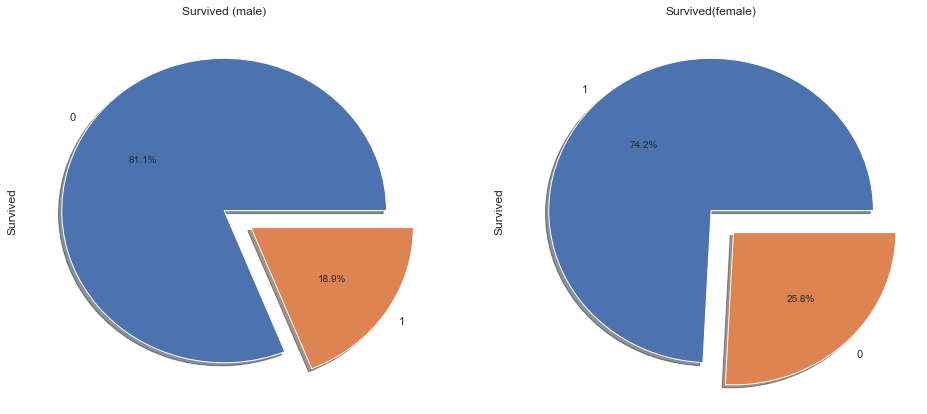

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(16, 7))
axes[0].set_title("Survived (male)")
train_df['Survived'][train_df['Sex'] == 'male'].value_counts(
).plot.pie(
    explode=[0, 0.2], ax=axes[0], shadow=True, autopct='%1.1f%%'
);
axes[1].set_title("Survived(female)")
train_df['Survived'][train_df['Sex'] == 'female'].value_counts(
).plot.pie(
    explode=[0, 0.2], ax=axes[1], shadow=True, autopct='%1.1f%%'
);

Women were more likely to survive than men

74 % of women survived but only 19% of men (in training set)

-> second model : all women survived and all men died

submission : 0.766 accuracy

In [30]:
test_df['Survived'] = test_df.Sex == 'female'
test_df['Survived'] = test_df.Survived.apply(lambda x: int(x))
test_df[['PassengerId', 'Survived']].to_csv('women_survive.csv', index=False)

## Passenger Class: Survival rate decreases with Pclass

In [35]:
pd.crosstab(train_df.Pclass, train_df.Survived, margins=True).style.background_gradient(cmap='autumn_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [43]:
print("% of survivals in")
for pclass in range(1, 4):
    print(f"Pclass {pclass}:", percent_of_survival('Pclass', pclass))

% of survivals in
Pclass 1: 0.6296296296296297
Pclass 2: 0.47282608695652173
Pclass 3: 0.24236252545824846


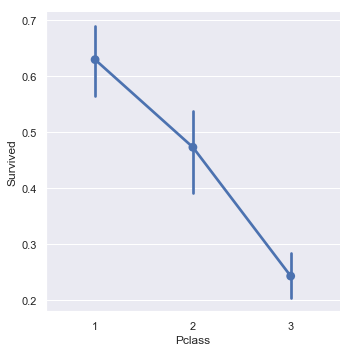

In [45]:
sns.catplot('Pclass', 'Survived', kind='point', data=train_df)

## Passenger Class and Sex:
Almost all women in Pclass 1 and 2 survived and nearly all men in 
pclass 2 and 3 died.

pclass: A proxy for socio-economic status (SES)
* 1st = Upper
* 2nd = Middle
* 3rd = Lower

In [48]:
pd.crosstab([train_df.Sex, train_df.Survived], train_df.Pclass, margins=True
).style.background_gradient(cmap='autumn_r')

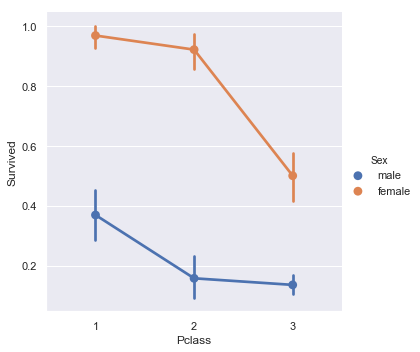

In [49]:
sns.catplot('Pclass', 'Survived', hue='Sex', kind='point', data=train_df)

## Embarked
Survival rate lowest for S and highest for C

embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

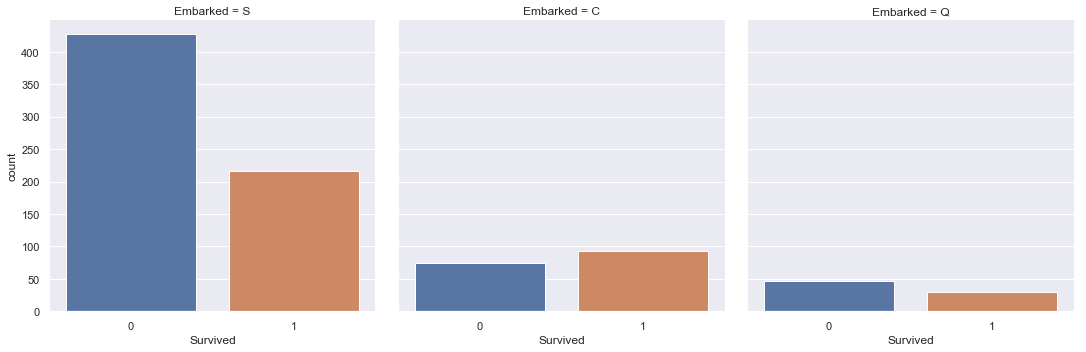

In [50]:
sns.catplot(x='Survived', col='Embarked', kind='count', data=train_df)

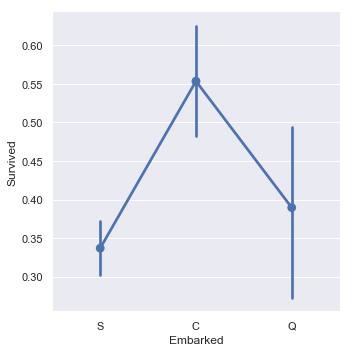

In [51]:
sns.catplot('Embarked','Survived', kind='point', data=train_df);

## Embarked and Sex

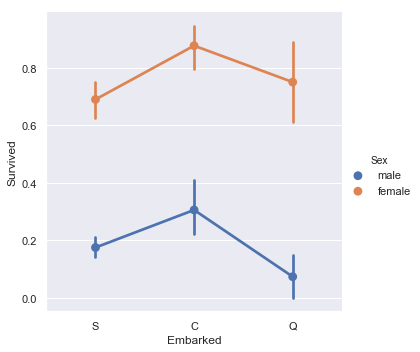

In [52]:
sns.catplot('Embarked', 'Survived', hue='Sex', kind='point', data=train_df)

## Embarked, Pclass and Sex:

Practically all women of Pclass 2 that embarked in C and Q survived, also nearly all women of Pclass 1 survived.

All men of Pclass 1 and 2 embarked in Q died, survival rate for men in Pclass 2 and 3 is always below 0.2

For the remaining men in Pclass 1 that embarked in S and Q, survival rate is approx. 0.4

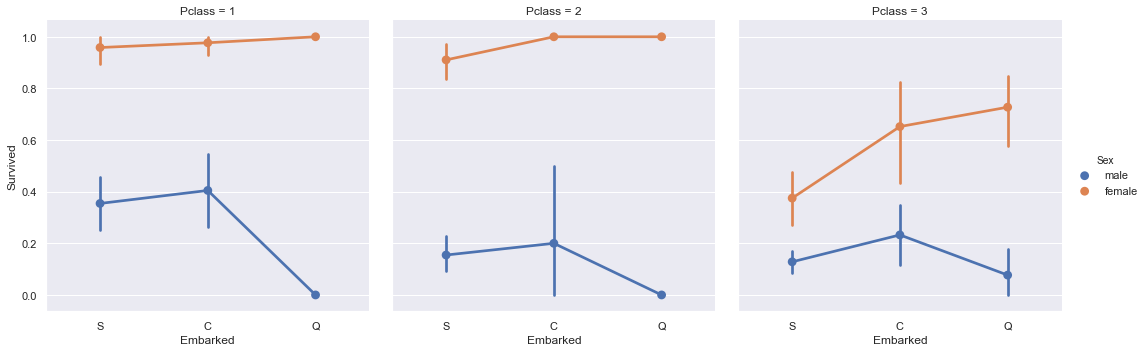

In [53]:
sns.catplot(
    'Embarked', 'Survived', col='Pclass', hue='Sex', kind='point', data=train_df
)

In [54]:
pd.crosstab([train_df.Survived], [train_df.Pclass, train_df.Embarked], margins=True)

Pclass     1           2           3           All
Embarked   C  Q    S   C  Q    S   C   Q    S     
Survived                                          
0         26  1   53   8  1   88  41  45  286  549
1         59  1   74   9  2   76  25  27   67  340
All       85  2  127  17  3  164  66  72  353  889

third model : based on PClass, Sex and Embarked , submission : 0.779 accuracy

In [56]:
test_df['Survived'] = 0
test_df.loc[(test_df.Sex == 'female'), 'Survived'] = 1
test_df.loc[(test_df.Sex == 'female') & \
            (test_df.Pclass == 3) & \
            (test_df.Embarked == 'S'), 'Survived'] = 0
test_df[['PassengerId', 'Survived']].to_csv('embarked_pclass_sex.csv', index=False)

## Age continuous numerical to 8 bins

In [60]:
for df in [train_df, test_df]:
    df['Age_bin'] = np.nan
    for i in range(8, 0, -1):
        df.loc[df['Age'] <= i * 10, 'Age_bin'] = i

In [62]:
train_df[['Age', 'Age_bin']].head(10)

,Age,Age_bin
0,22.0,3.0
1,38.0,4.0
2,26.0,3.0
3,35.0,4.0
4,35.0,4.0
5,NaN,NaN
6,54.0,6.0
7,2.0,1.0
8,27.0,3.0
9,14.0,2.0


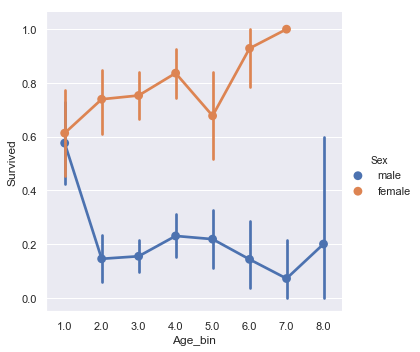

In [63]:
sns.catplot('Age_bin', 'Survived', hue='Sex', kind='point', data=train_df)

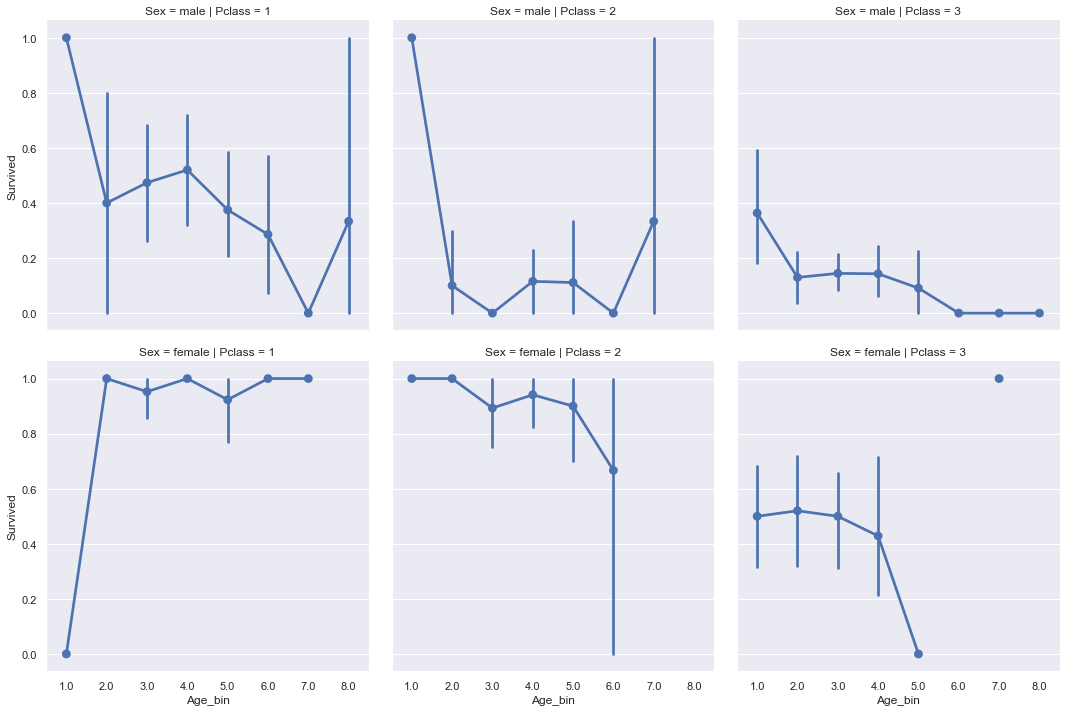

In [64]:
sns.catplot('Age_bin', 'Survived', col='Pclass', row='Sex', kind='point', data=train_df)

In [65]:
pd.crosstab([train_df.Sex, train_df.Survived],
            [train_df.Age_bin, train_df.Pclass], margins=True
           ).style.background_gradient(cmap='autumn_r')

# SibSp and Parch

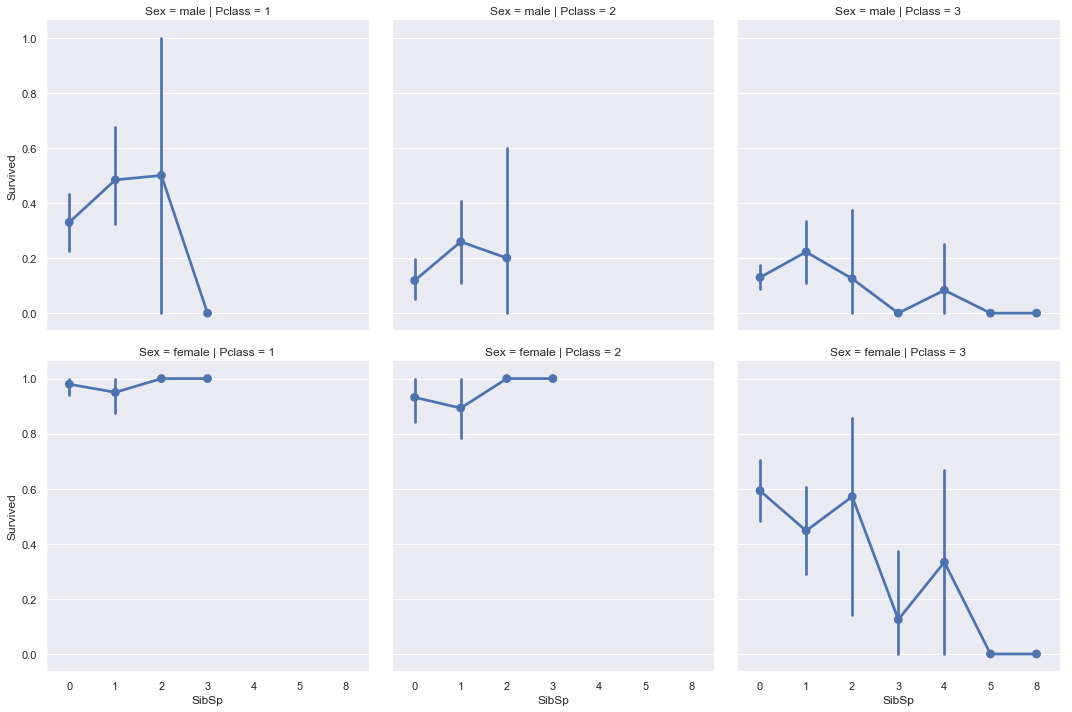

In [66]:
sns.catplot(
    'SibSp', 'Survived',
    col='Pclass', row='Sex', kind='point', data=train_df
)

In [79]:
pd.crosstab(
    [train_df.Sex, train_df.Survived],
    [train_df.SibSp, train_df.Pclass],
    margins=True
).style.background_gradient(cmap='autumn_r')

sibsp: The dataset defines family relations in this way...
* Sibling = brother, sister, stepbrother, stepsister
* Spouse = husband, wife (mistresses and fiancés were ignored)

For males, no survival rate above 0.5 for any values of SibSp. For females, passengers with SibSp = 3 and Pclass = 3 died, also all females with SibSp > 4 died. For females with SibSp = 1 and Pclass = 3 survival rate is below 0.5

## Fare continuous numerical to 12 bins

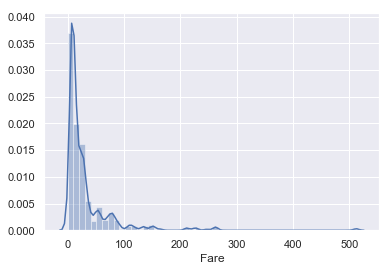

In [80]:
sns.distplot(train_df['Fare'])

In [81]:
for df in [train_df, test_df]:
    df['Fare_bin']=np.nan
    for i in range(12,0,-1):
        df.loc[ df['Fare'] <= i*50, 'Fare_bin'] = i


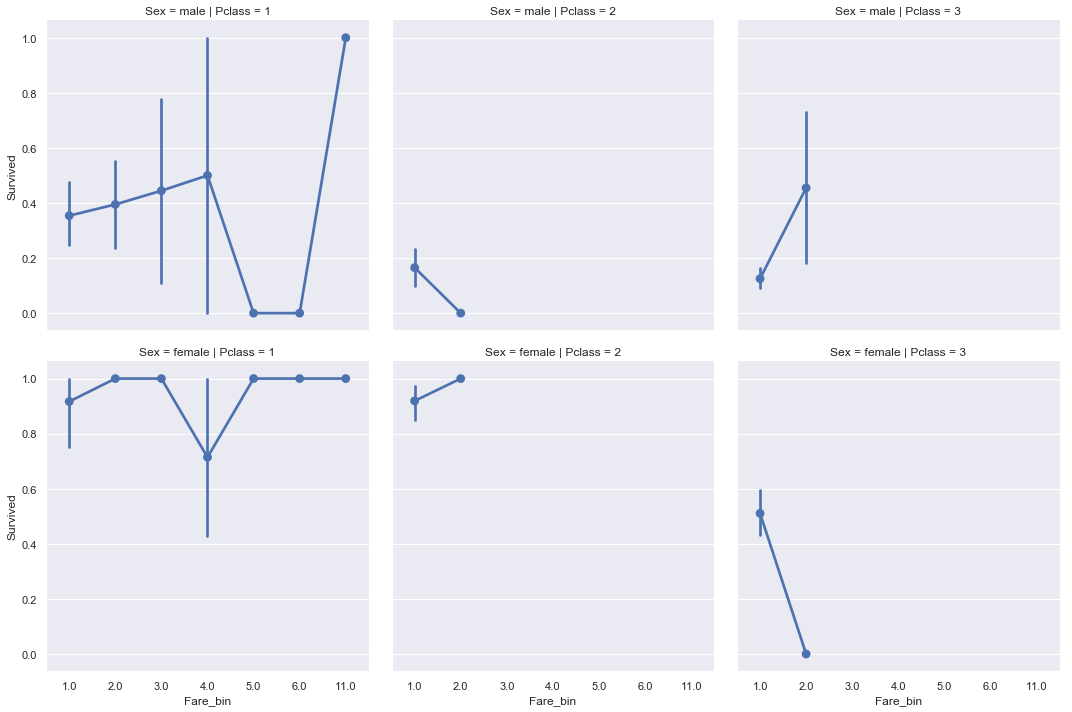

In [82]:
sns.catplot(
    'Fare_bin',
    'Survived',
    col='Pclass' , row = 'Sex', kind='point', data=train_df
);

In [83]:
pd.crosstab(
    [train_df.Sex, train_df.Survived],
    [train_df.Fare_bin, train_df.Pclass],
    margins=True
).style.background_gradient(cmap='autumn_r')

parch: The dataset defines family relations in this way...
* Parent = mother, father
* Child = daughter, son, stepdaughter, stepson
* Some children travelled only with a nanny, therefore parch=0 for them.